# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.270707e+01     6.993133e+00
 * time: 0.0046041011810302734
     1     3.007672e+01     5.060563e+00
 * time: 0.014352083206176758
     2     2.479655e+01     7.213218e+00
 * time: 0.03837394714355469
     3     1.668560e+01     3.775122e+00
 * time: 0.06686592102050781
     4     1.317054e+01     2.411839e+00
 * time: 0.09145689010620117
     5     1.220112e+01     3.027094e+00
 * time: 0.10936093330383301
     6     1.139928e+01     1.791396e+00
 * time: 0.12635087966918945
     7     1.088504e+01     1.828230e+00
 * time: 0.14391303062438965
     8     9.983153e+00     1.539350e+00
 * time: 0.1611919403076172
     9     9.594530e+00     1.143958e+00
 * time: 0.17957401275634766
    10     9.295911e+00     6.990765e-01
 * time: 0.19673800468444824
    11     9.271231e+00     1.196911e+00
 * time: 0.20983290672302246
    12     9.085248e+00     9.489373e-01
 * time: 0.22279000282287598
    13     8.829190e+00     6.536847e-01
 * tim

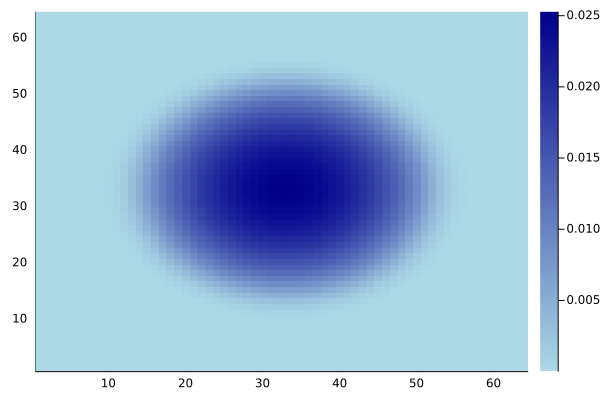

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)